# pymsteamsを使用

In [2]:
! py -m pip install pymsteams

- ライブラリインストール  
`! py -m pip install pymsteams`

※「! 」はCMDから実行する際は不要。Jupyterで実行する際は必要  


- 事前に送付したいチームのWebhookのアドレスを設定する。  
手順：https://www.webtomoblg.net/web/python-microsoft-teams-first/  
※最初はテスト用のチャネルを作った方が良いかも。  

- 一番単純な使い方  

```python
import pymsteams
teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title(***************)
myTeamsMessage.text(***************)
myTeamsMessage.send()
```

In [1]:
import pymsteams
import datetime as dt
teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

kyou = dt.datetime.today().strftime("%Y-%m-%d")
print(kyou)

myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title(f'{kyou} 送信テスト')
myTeamsMessage.text('これはテストです')
myTeamsMessage.send()

print('sending completed!')

2023-02-28
sending completed!


 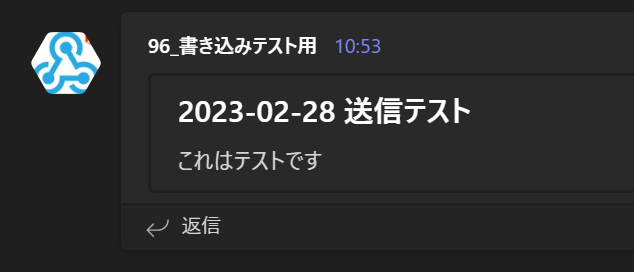

# requestを使用

- ライブラリインストール  
`! py -m pip install requests`  

※「! 」はCMDから実行する際は不要。Jupyterで実行する際は必要  

- 一番単純な使い方  

```python
import requests
import json
teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

message = '送りたいアダプティブカード（jsonに変換する対象の文字列）'
data = json.loads(message, strict=False)
requests.post(teams_webhook, json.dumps(data))
```

- アダプティブカードについては、Webを検索して調べてください。いろいろできますが結構大変です。

---------------------------------------------------------------------------------------------------------------------------------

# 色々なものをTeamsに送付する

## 定期実行時、プログラムのエラーをTeamsに送付
（24_Log掃き出し　に記載した内容と一緒）

In [ ]:
# 必要な情報入力。入れ替えて使えそうな変数は最初に定義しておく
ID = "******"
PW = "***********"
line_no = 3
# teams_webhook = "https://kyoceragp.webhook**********"

# ライブラリのインストール（自分のコードに必要なものを
import sqlalchemy as sa
import pymysql
import datetime
import pandas as pd
import sys
import time
import re
import pymsteams
import os

# ログ開始
ep_s = time.time()
tm_s = time.strftime("%Y/%m/%d %H:%M:%S", time.localtime(ep_s))
log = f"\nStartLog：{time.strftime('%Y/%m/%d %H:%M:%S', time.localtime(ep_s))}\n"
x = os.getcwd()

try:            
    """ここに実行したい処理を入れる
    tryの中なので、すべてインデントを一つ下げる（複数行選択してtabキー）。ifやforが入ったら、さらにインデントが下がる。"""

except Exception as e:
    log += f"(line{sys.exc_info()[2].tb_lineno}):{e.args}\n"
    try:
        current_dir = os.getcwd() # このpyファイルの場所を送りたいのでcurrent_dirに入れてる。%pwdはpyファイルでは使えません
        myTeamsMessage = pymsteams.connectorcard(teams_webhook)
        myTeamsMessage.title("【フローの名前】エラー発生")
        myTeamsMessage.text(f"{log}'<br>current_dir: '{current_dir}")
        myTeamsMessage.send()
        print("sending compleated")
        log += f"\nProcessLog：sending compleated to Teams\n"
        print(log)
    except Exception as e:
        log += f"(line{sys.exc_info()[2].tb_lineno}):{e.args}\n"
        
ep_e = time.time()
log += f"EndLog：{round(ep_e - ep_s, 1)} 秒\n"
log = log.replace('<br>', '')
print(log)

# テキストファイルにログを書き出す。このテキストファイルはpyファイルと同じ場所に置いておく
file = "./フローの名前_ログ.txt"
with open(file, "a", encoding="utf8") as f:
    f.write(log)

## DataFrameをメッセージに送付する

In [1]:
import pandas as pd
import pymsteams

# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

df = pd.DataFrame([["a1", "b1", 1], ["a2", "b2", 2]], columns=["col1", "col2", "col3"])
display(df)
html_df = df.to_html()

myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title('テスト用DF送信')
myTeamsMessage.text(html_df)
myTeamsMessage.send()

print('sending completed!')

,col1,col2,col3
0,a1,b1,1
1,a2,b2,2


sending completed!


 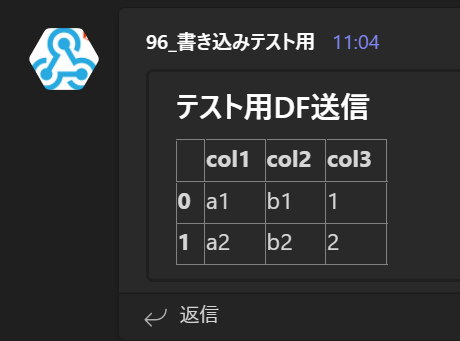

## 画像を送付する

- 送付する画像のサイズが大きすぎる（チャットの容量が28KB以上）場合は、あらかじめ画像を小さくしておくか、リサイズする。参考：[Microsoft Teams の制限事項と仕様](https://learn.microsoft.com/ja-jp/microsoftteams/limits-specifications-teams)  
こういうエラーがTeamsに出る場合は、画像サイズが大きすぎて送れていない。  
`This message is too long to display here. Please visit the external source app to view the message.`  

- 今回、リサイズにはPILを使用。リサイズ後の画像を新しく保存してTeamsに送付している。リサイズしたくなければ、そもそもの画像を小さくしておく。  
参考：[【Pillow】Pythonで画像のサイズと解像度変更](https://chayarokurokuro.hatenablog.com/entry/2019/09/14/013746)  
　　　[Pythonで画像サイズ（容量）を小さくする](https://shikaku-mafia.com/python-image-size/)

In [2]:
import pymsteams
import base64
from PIL import Image
from pathlib import Path
import os

# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"
photo = r'./file/blackcat.jpg'

filename = Path(photo)
photosize = filename.stat().st_size
print(photosize/1000, "KB")

# 「チャットの容量」なんてわからないので、画像サイズが15KB以上だったら縮小することにする（場合によってはこれでも送れないかも）
while photosize > 15*1000:
    bai = photosize / (15*1000)
    img = Image.open(photo)
    width, height = img.size
    img_resize = img.resize((int(width//bai), int(height//bai)))
    
    filename = Path(photo)
    newname = filename.parent/f'{filename.stem}_1.jpg'
    img_resize.save(newname)
    print("リサイズ後：", Path(newname).stat().st_size/1000, "KB")
    photo = newname
    photosize = Path(newname).stat().st_size

# グラフのファイルを開いてTeamsに貼り付けられる書式に変更
with open(photo, "rb") as file:
    base64image = base64.b64encode(file.read()).decode("ascii")
    image_photo = "![]" + "(" + f"data:image/png;base64,{base64image}" + ")"
    
myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title('BLACK CAT')
myTeamsMessage.text(image_photo)
myTeamsMessage.send()
print('sending completed!')

# print(photosize, newname)

# 送付用リサイズ画像の消去
if filename.stat().st_size > 15*1000:
    newname.unlink()
else:
    pass

print("end")

19.834 KB
リサイズ後： 10.352 KB
sending completed!
end


 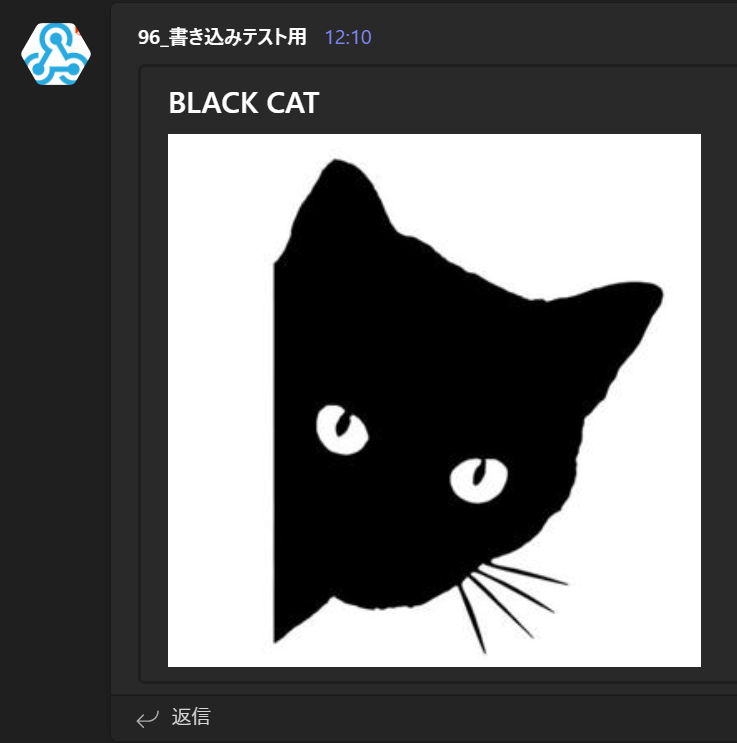

## リンクを送付する

In [2]:
import pymsteams
# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

link_string = "Yahoo! JAPAN"
url = "https://www.yahoo.co.jp/"

teams_body = f"[{link_string}]({url})"

myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title("URL Link")
myTeamsMessage.text(teams_body)
myTeamsMessage.send()

print('sending completed!')

sending completed!


 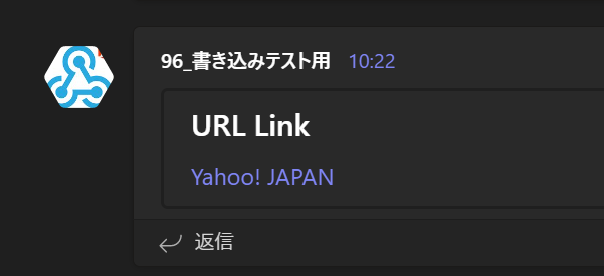

## おまけ：　マークダウン記法で装飾ができます

In [1]:
import pymsteams
# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

link_string = "Yahoo! JAPAN"
url = "https://www.yahoo.co.jp/"

# 改行は<br>なので注意
teams_body = f"[{link_string}]({url})<br>**太字**<br>`select * from table`"

myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title("マークダウン記法のテスト")
myTeamsMessage.text(teams_body)
myTeamsMessage.send()

print('sending completed!')

sending completed!


 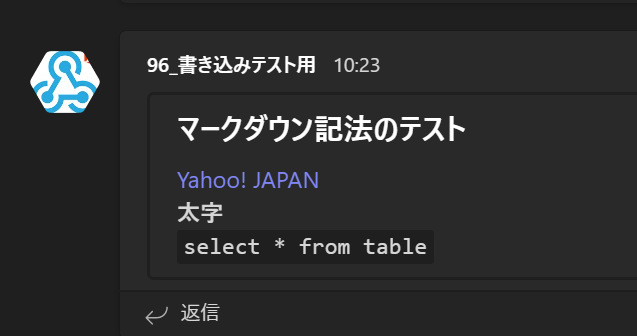

## セクションを追加

In [2]:
# グラフと画像を同時に送信する（同じところにtextを2つ貼る方法が無かった）
import pymsteams
import base64
from PIL import Image
from pathlib import Path
import pandas as pd

# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

photo = r'./file/blackcat.jpg'
df = pd.DataFrame([["a1", "b1", 1], ["a2", "b2", 2]], columns=["col1", "col2", "col3"])
html_df = df.to_html()

# 画像の容量が28KB以上の場合、リサイズする。下記は単純に縦横のピクセル数を半分にしている。状況に合わせて変更する
img = Image.open(photo)
width, height = img.size
img_resize = img.resize((width//2, height//2))

filename = Path(photo)
newname = filename.parent/f'{filename.stem}_1.jpg'
img_resize.save(newname)
photo = newname
# リサイズはここまで（不要ならこのブロックは飛ばして良い

# グラフのファイルを開いてTeamsに貼り付けられる書式に変更
with open(photo, "rb") as file:
    base64image = base64.b64encode(file.read()).decode("ascii")
    image_photo = "![]" + "(" + f"data:image/png;base64,{base64image}" + ")"
    
myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title('BLACK DATA')
myTeamsMessage.text(html_df)

# セクションを追加して画像を送付する
section1 = pymsteams.cardsection()
section1.text(image_photo)
myTeamsMessage.addSection(section1)

section2 = pymsteams.cardsection()
section2.text('今日も黒猫がかわいい')
myTeamsMessage.addSection(section2)

myTeamsMessage.send()

newname.unlink() # 送付用リサイズ画像の消去
print('sending completed!')

sending completed!


 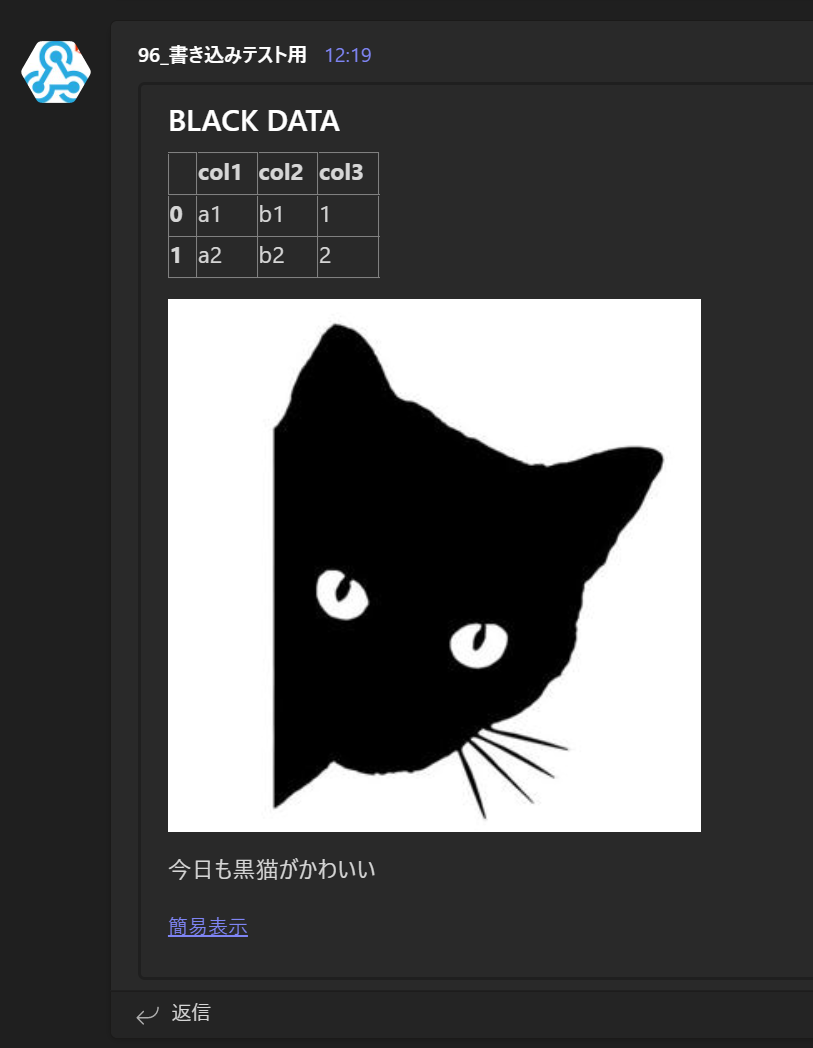

## フォントサイズ変更

In [1]:
import pymsteams
import pandas as pd

# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

df = pd.DataFrame([["a1", "b1", 1], ["a2", "b2", 2]], columns=["col1", "col2", "col3"])
html_df = df.to_html()
html_df2 = html_df.replace('class="dataframe"', 'style="font-size : 10px;"')
html_df2 = html_df2.replace('<tr style="text-align: right;">', '<tr style="font-size : 24px;">')
html_df2 = html_df2.replace("\n", " ")

myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title(f'フォント変更テスト')
myTeamsMessage.text(html_df2)
myTeamsMessage.send()

print('sending completed!')

sending completed!


 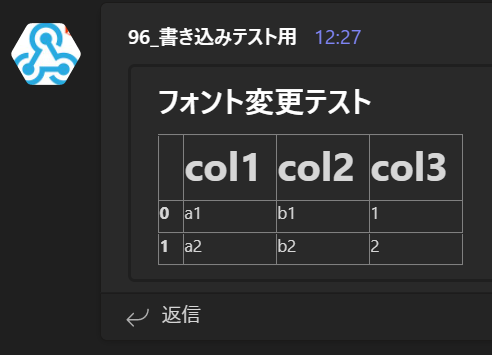

## Teamsにメンションする
そういう関数等がないので、基本的にはTeamsのアダプティブカードを自動生成するようなコードを書く

### pymsteamsを使用

In [3]:
import pymsteams
import pandas as pd
import matplotlib.pyplot as plt
import base64
import mimetypes

# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

mailto = "hoge.hogehoge.xm@kyocera.jp" # メールアドレス
nameto = "ほげほげ" # 表示名
message = "なにかの文字列 \n\n なにかの文字列" # メッセージ。アダプティブカードの改行は「\n\n」

myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title("テスト")

myTeamsMessage.payload = {
    "type": "message",
    "attachments": [
        {
        "contentType": "application/vnd.microsoft.card.adaptive",
        "content": {
            "type": "AdaptiveCard",
            "body": [
                {
                    "type": "TextBlock",
                    "text": "<at>"f"{mailto}""</at> さん \n\n"f"{message}"
                }
            ],
            "$schema": "http://adaptivecards.io/schemas/adaptive-card.json",
            "version": "1.4",
            "msteams": {
                "entities": [
                    {
                        "type": "mention",
                        "text": "<at>"f"{mailto}""</at>",
                        "mentioned": {
                            "id": f"{mailto}",
                            "name": f"{nameto}"
                        }
                    }
                ]
            }
        }
    }]
}

myTeamsMessage.send()
print('sending completed!')

sending completed!


 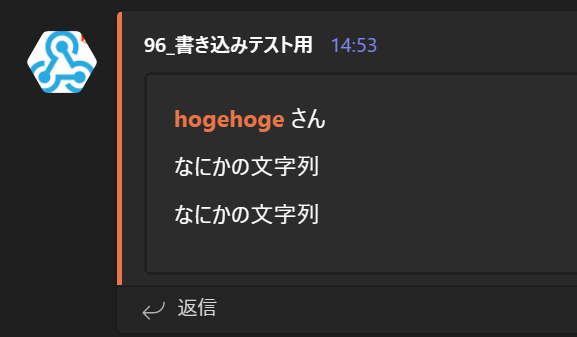

#### Teamsメンション＋DataFrame送付（画像）

今のところ、TeamsにメンションしながらDataFrameを送る方法が分かっていません。（DataFrameを画像にして貼り付けることはできました）  
もしやり方がわかった方がいらっしゃいましたら、ご一報ください。

data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWgAAAEgCAYAAACZ7unUAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bG
sending completed!


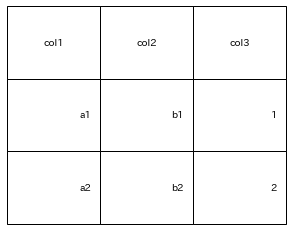

In [1]:
import pymsteams
import pandas as pd
import matplotlib.pyplot as plt
import base64
import mimetypes
from pathlib import Path

# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

mailto = "hoge.hogehoge.xm@kyocera.jp" # 実在するメールアドレス
nameto = "ほげほげ" # 表示名

df = pd.DataFrame([["a1", "b1", 1], ["a2", "b2", 2]], columns=["col1", "col2", "col3"])

#データフレームをmatplotlibでイメージファイルにする
# (アダプティブカードで送るための苦肉の策…)
def TablePlot(df, outputPath, w, h):
    fig, ax = plt.subplots(figsize=(w,h))
    ax.axis('off')
    ax.table(cellText=df.values,
             colLabels=df.columns,
             loc='center',
             bbox=[0,0,1,1])
    plt.savefig(outputPath)
    
TablePlot(df,"dataframe.png",5,4)

# 画像化したdataframeをデータURIに変換
file_path = "dataframe.png"
 
with open(file_path, "rb") as image_file:
    # bufに格納
    buf = image_file.read()
 
    # base64のdata取得
    data = base64.b64encode(buf)
    data_str = data.decode('utf-8')
 
    # MIMEタイプ取得
    mime_type = mimetypes.guess_type(file_path)
 
    # Data URI
    data_uri = "data:" + mime_type[0] + ";base64," + data_str
    print(data_uri[:100])

myTeamsMessage = pymsteams.connectorcard(teams_webhook)
myTeamsMessage.title("テスト")

myTeamsMessage.payload = {
    "type": "message",
    "attachments": [
        {
        "contentType": "application/vnd.microsoft.card.adaptive",
        "content": {
            "type": "AdaptiveCard",
            "body": [
                {
                    "type": "TextBlock",
                    "text": "<at>"f"{mailto}""</at> さん"
                },
                {
                    "type": "Image",
                    "url": f"{data_uri}"
                }
            ],
            "$schema": "http://adaptivecards.io/schemas/adaptive-card.json",
            "version": "1.4",
            "msteams": {
                "entities": [
                    {
                        "type": "mention",
                        "text":  "<at>"f"{mailto}""</at>",
                        "mentioned": {
                            "id": f"{mailto}",
                            "name": f"{nameto}"
                        }
                    }
                ]
            }
        }
    }]
}

myTeamsMessage.send()
Path(file_path).unlink()
print('sending completed!')

 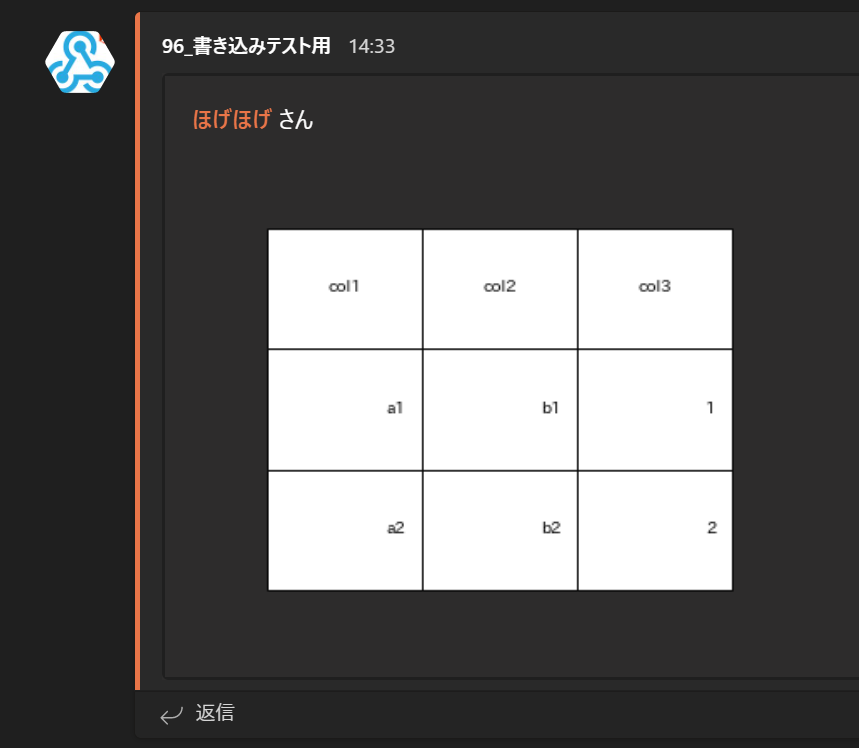

### requestを使用して、アダプティブカードで送付リストにある複数人にメンションする＋Webリンクを貼る

【参考】  
[220513_打刻ミス防止対策ボット作成](https://kyoceragp.sharepoint.com/:f:/s/Pythonista580/EuMgx69Mo91PgAGky3Pb8JIBGvtjWxf7Bl49cQMIOpsGPg?e=oCh3E0&xsdata=MDV8MDF8fDU2NmExNTBiYmYxYTQ4ODgxZGNkMDhkYjI0NmFmOTBlfDgyY2MxODdlMjVkNTQ1ZTQ4YzM0ODQzNGJmNjA3NWZlfDB8MHw2MzgxNDM4MTQwNjY2NDIzODF8VW5rbm93bnxWR1ZoYlhOVFpXTjFjbWwwZVZObGNuWnBZMlY4ZXlKV0lqb2lNQzR3TGpBd01EQWlMQ0pRSWpvaVYybHVNeklpTENKQlRpSTZJazkwYUdWeUlpd2lWMVFpT2pFeGZRPT18MXxNVFkzT0RjNE5EWXdOakV4TVRzeE5qYzROemcwTmpBMk1URXhPekU1T2pjNU5HWTJaREU0TldabU9EUXhNbUZpTXpVNE1qZGpNRGt4TkROaFptVmlRSFJvY21WaFpDNTBZV04yTWc9PXxjYWYwZTdhZDdkMDU0YzI4MWRjZDA4ZGIyNDZhZjkwZXw4ZDU0NDEzNWZmOTM0MTliOWU2ZTRmYjg5MzJlMzhlZg%3D%3D&sdata=bC9YSjI5dno4ZzFPZlREMUhxc21ncmZiSDU4dXdUVHp2aW5BNUh6VHZuST0%3D)  
[221118_Formsアンケートのリマインダー](https://kyoceragp.sharepoint.com/:f:/s/Pythonista580/EvdjbfvkMiNNpWhgHjOS7OwBw5czQ3oDk13cJ7App0buBA?e=Id8RhF&xsdata=MDV8MDF8fDU2NmExNTBiYmYxYTQ4ODgxZGNkMDhkYjI0NmFmOTBlfDgyY2MxODdlMjVkNTQ1ZTQ4YzM0ODQzNGJmNjA3NWZlfDB8MHw2MzgxNDM4MTQwNjY2NDIzODF8VW5rbm93bnxWR1ZoYlhOVFpXTjFjbWwwZVZObGNuWnBZMlY4ZXlKV0lqb2lNQzR3TGpBd01EQWlMQ0pRSWpvaVYybHVNeklpTENKQlRpSTZJazkwYUdWeUlpd2lWMVFpT2pFeGZRPT18MXxNVFkzT0RjNE5EWXdOakV4TVRzeE5qYzROemcwTmpBMk1URXhPekU1T2pjNU5HWTJaREU0TldabU9EUXhNbUZpTXpVNE1qZGpNRGt4TkROaFptVmlRSFJvY21WaFpDNTBZV04yTWc9PXxjYWYwZTdhZDdkMDU0YzI4MWRjZDA4ZGIyNDZhZjkwZXw4ZDU0NDEzNWZmOTM0MTliOWU2ZTRmYjg5MzJlMzhlZg%3D%3D&sdata=dkZMK0ZOTEd0cCtFUVdQNTlsdFU5WVYvc2dpblkwNjBYSXhTT1hOcmpiST0%3D)  
[220311_Selenium_残業自動申請](https://kyoceragp.sharepoint.com/:f:/s/Pythonista580/EqqZ4fvaiwBCqB9fnPnIOikBU3JghgrD-Jzgdq-J8RizBw?e=WDg5DE&xsdata=MDV8MDF8fDU2NmExNTBiYmYxYTQ4ODgxZGNkMDhkYjI0NmFmOTBlfDgyY2MxODdlMjVkNTQ1ZTQ4YzM0ODQzNGJmNjA3NWZlfDB8MHw2MzgxNDM4MTQwNjY2NDIzODF8VW5rbm93bnxWR1ZoYlhOVFpXTjFjbWwwZVZObGNuWnBZMlY4ZXlKV0lqb2lNQzR3TGpBd01EQWlMQ0pRSWpvaVYybHVNeklpTENKQlRpSTZJazkwYUdWeUlpd2lWMVFpT2pFeGZRPT18MXxNVFkzT0RjNE5EWXdOakV4TVRzeE5qYzROemcwTmpBMk1URXhPekU1T2pjNU5HWTJaREU0TldabU9EUXhNbUZpTXpVNE1qZGpNRGt4TkROaFptVmlRSFJvY21WaFpDNTBZV04yTWc9PXxjYWYwZTdhZDdkMDU0YzI4MWRjZDA4ZGIyNDZhZjkwZXw4ZDU0NDEzNWZmOTM0MTliOWU2ZTRmYjg5MzJlMzhlZg%3D%3D&sdata=M3BuOGtnV2IxbUd5TUVwaE9vekgxd3MrdDRGVXFhU1FLVkduN2hSMEEzQT0%3D)  

In [1]:
import requests
import pandas as pd
from pathlib import Path
import json
import os

mention_excel = "25_Teamsメンションリスト.xlsx"
message_t = "なにかの文字列"
# teams_webhook = "https://kyoceragp.webhook**********（上記で設定したWebhookのURL）"

mention_file = list(Path(r"./file").glob(mention_excel))[0]
df1 = pd.read_excel(mention_file)
display("■メンションリスト", df1)

mn_list = ""
mnadd_list = ""

# アダプティブカードに組み込むメンション用文字列の作成
for i in range(0, len(df1)):
    mailadd = df1.at[i, "Mail_address"]
    mentionto = df1.at[i, "Name"]
    mn_list = mn_list + f"<at>{mentionto}</at>さん、"
    mnadd_list = mnadd_list + f"""
                        {{
                            "type": "mention",
                            "text": "<at>{mentionto}</at>",
                            "mentioned": {{
                                "id": "{mailadd}",
                                "name": "{mentionto}"
                            }}
                        }},"""
mnadd_list = mnadd_list[:-1]
# print(mnadd_list)

# アダプティブカードの設定
message2 = f"""
{{
    "type": "message",
    "attachments": [
        {{
            "contentType": "application/vnd.microsoft.card.adaptive",
            "content": {{
                "type": "AdaptiveCard",
                "version": "1.0",
                "body": [
                    {{
                        "type": "TextBlock",
                        "text": "【テスト】打刻ミス撲滅Botからのご連絡】",
                        "size": "Large",
                        "weight": "Bolder"
                    }},
                    {{
                        "type": "TextBlock",
                        "text": "{mn_list}出勤打刻がありません。ご確認をお願いします。",
                        "wrap": true
                    }},
                    {{
                        "type": "TextBlock",
                        "text": "{message_t}"
                    }}
                ],
                "actions": [
                    {{
                        "type": "Action.OpenUrl",
                        "url": "http://jnjhp.in.kyocera.co.jp/fw/dfw/DMP/jp/top.html",
                        "title": "人事労務Webのリンクを開く"
                    }}
                ],
                "msteams": {{
                    "width": "Full",
                    "entities": [
                        {mnadd_list}
                    ]
                }}
            }}
        }}
    ]
}}
"""

#         Teamsにメッセージを送る
data2 = json.loads(message2, strict=False)
requests.post(teams_webhook, json.dumps(data2))
print("Python経由でTeamsにメッセージを通知(送信)しました。")

'■メンションリスト'

,Mail_address,Name
0,kie.ibaragi.xm@kyocera.jp,hogehoge
1,shinichi.miki.xm@kyocera.jp,fugafuga


Python経由でTeamsにメッセージを通知(送信)しました。


 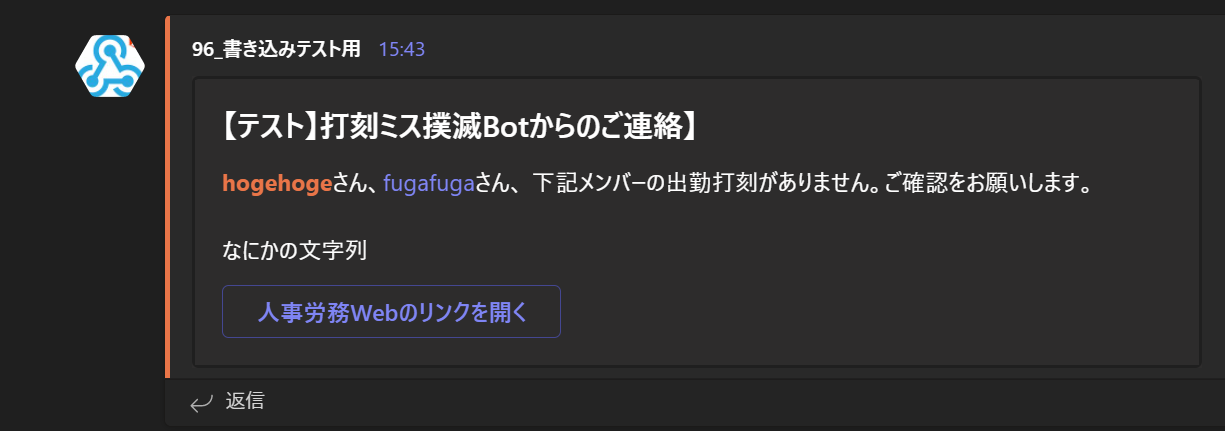

---------------------------------------------------